# <center>Premier Modèle IA</center>

___

# Introduction

L'objectif de ce brief est de détailler les fonctions appliquées à un ensemble de donnée lors de la construction d'un modèle prédictif construit autour d'une modélisation par régression.

Pour ce faire, nous allons tout d'abord détailler les calculs mathématiques qui seront à appliquer, puis détailler le programme python permettant de reproduire les différents modèles, avant de reproduire ces étapes avec la bibliothéque Scikit-Learn, pour enfin comparer les différents résultats obtenus.

___

# Sommaire

1. [Rappels sur la régression](#Rappels-sur-la-régression)
    1. [Régression linéaire simple](#Régression-linéaire-simple)
    2. [Régression linéaire multiple](#Régression-linéaire-multiple)
    3. [Régression polynomiale](#Régression-polynomiale)
    4. [Fonction de coût](#Fonction-de-coût)
    5. [Gradient](#Gradient)
    6. [Descente de gradient](#Descente-de-gradient)
2. [Étude des données](#Étude-des-données)
3. [Présentation des résultats](#Présentation-des-résultats)
4. [Évaluation des résultats](#Évaluation-des-résultats) 
5. [Présentation des résultats avec Scikit-Learn](#Présentation-des-résultats-avec-Scikit-Learn)
6. [Comparaison avec la méthode normale](#Comparaison-avec-la-méthode-normale)
7. [Conclusion](#Conclusion)
8. [Sources](#Sources)

___

# Rappels sur la régression

"[En mathématiques, la régression recouvre plusieurs méthodes d’analyse statistique permettant d’approcher une variable à partir d’autres qui lui sont corrélées. Par extension, le terme est aussi utilisé pour certaines méthodes d’ajustement de courbe.[1]](#1)"

Le principe d'une régression est de trouver les coefficients d'une fonction mathématique représentant un modèle choisi. Ce choix ayant été réalisé lors d'un précédent travail, vous pourrez trouver toutes les précisions nécessaires sur [cette page résumant l'utilisation de la bibliothèque Scikit-Learn](https://github.com/Gwenn-LR/CahierApprentissage/blob/master/data/notebook/Scikit-Learn.ipynb).

Les images de cette partie sonte extraites de la présentation de Youssef Mourchid sur le [Machine Learning](#2).

## Régression linéaire simple

Une régression linéaire simple peut être envisagée lorsque l'on cherche à prédire une variable à partir d'une autre, qui lui est corrélée.

On peut alors considérer l'ensemble des $m$ données comme composée d'inconnues ($y$, la cible) fonctions de variables ($x$, les caractéristiques) :

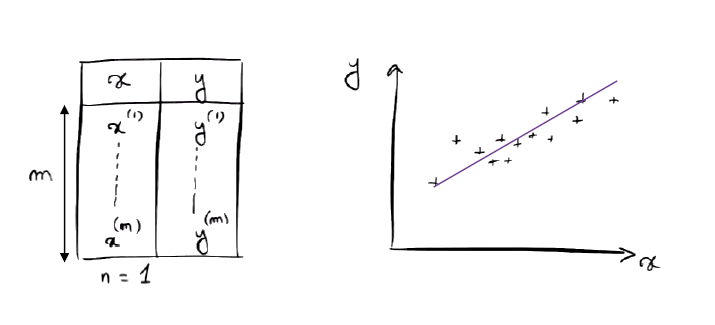

<center>Représentation de l'ensemble des données sous forme de matrice et d'un graphique </center>

L'objectif de la modélisation est alors de trouver les coefficients de la fonction (ici affine) afin de pouvoir prédire une valeur cible $f(x)$ à partir de celle d'une variable donnée $x$.

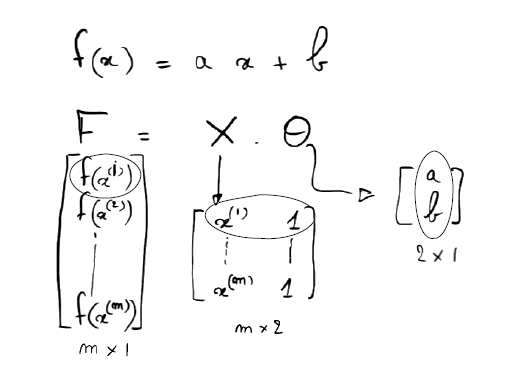
<center>Représentation du problème linéaire à une dimension sous forme matricielle</center>

## Régression linéaire multiple 

Dans le cas où nous avons à notre disposition plus de caractéristiques, nous pouvons reprendre ce protocole en rajoutant une variable $x_i$ au coefficient du modèle pour chaque caractéristique qui semble corrélée à la cible $f$.

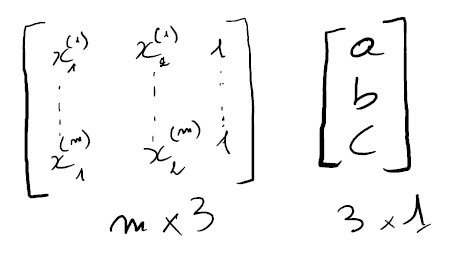
<center>Représentation de l'ensemble des données sous forme de matrice</center>

La fonction $f$ de prédiction ne dépendra alors plus d'une variable, mais de plusieurs. Dans cet exemple, $a$, $b$ et $c$ sont les coefficients d'un modèle $f$ pour une cible $y$ corrélée avec 2 caractéristiques, $x_1$ et $x_2$.

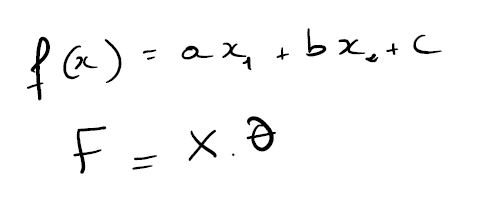
<center>Représentation du problème linéaire à plusieurs dimensions sous forme matricielle</center>

## Régression polynomiale 

Enfin, si une caractéristique ne semble pas corrélée à une cible, une de ses puissance peut très bien l'être. On peut alors reprendre le modèle de régression linéraire multiple, en construisant $i$ nouvelles caractéristiques, $i$ étant le degré de la fonction de prédiction.

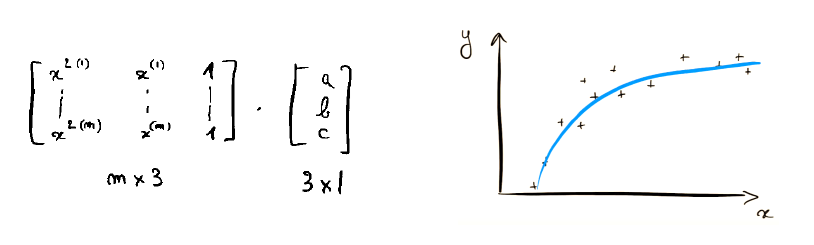
<center>Représentation de l'ensemble des données sous forme de matrice et d'un graphique</center>

On peut alors appliquer la même fonction matricielle que les précédents modèles. Dans cet exemple, les coefficients  $a$, $b$ et $c$ sont ceux d'un modèle $f$ d'une cible $y$ corrélée avec les 2 premières puissance de $x$

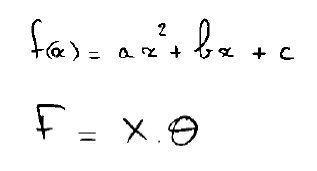
<center>Représentation du problème polynomial sous forme matricielle</center>

## Fonction de coût

La fonction de coût implémente la méthode des moindres carrés et permet de valider l'hypothèse d'un problème de Machine Learning **supervisé** $h$, qui veut que le coût d'apprentissage puisse être considéré comme étant négligeable. Ce coût peut être calculé à partir des valeurs de la cible et des valeurs prédites, de la manière suivante :

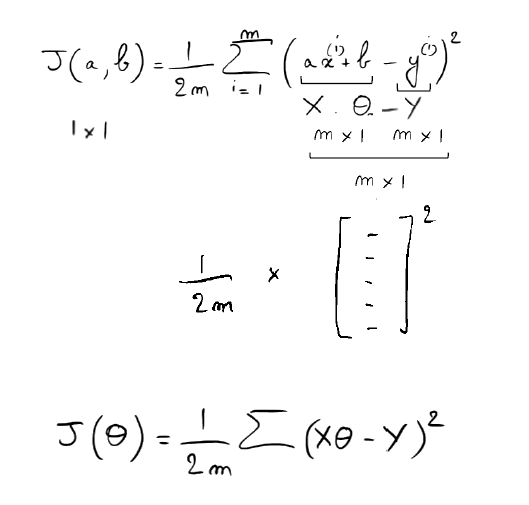
<center>Application de la méthode des moindres carrés à un problème de Machine Learnig supervisé</center

## Gradient

Le gradient d'une fonction en un point est un vecteur qui caractérise la variabilité de cette fonction au voisinage de ce point.
Il est donc possible de savoir s'il est possible de diminuer le coût d'un modèle prédictif, en appliquant ce gradient à la fonction de coût décrite ci-dessus, de la manière suivante :

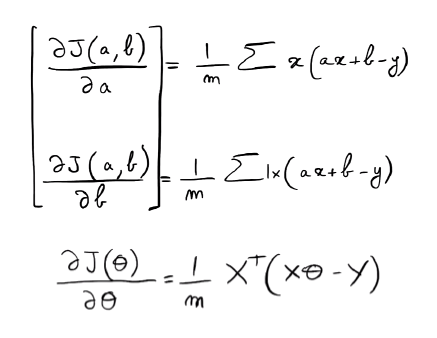

## Descente de gradient

On peut alors chercher à minimiser la valeur du coût d'un modèle supervisé en implémentant la méthode de descente de gradient, permetant à l'aide d'un coefficient d'apprentissage $\alpha$ et d'un nombre d'itération $n$ donnés, de préciser les valeurs du coefficient du modèle.

Les équations restant valables pour des fonctions à variables multiples, le schéma ci-dessous, détaillant la méthode de la descente de gradient pour une régression linéaire simple, reste vraie pour les autres régressions citées plus haut. 

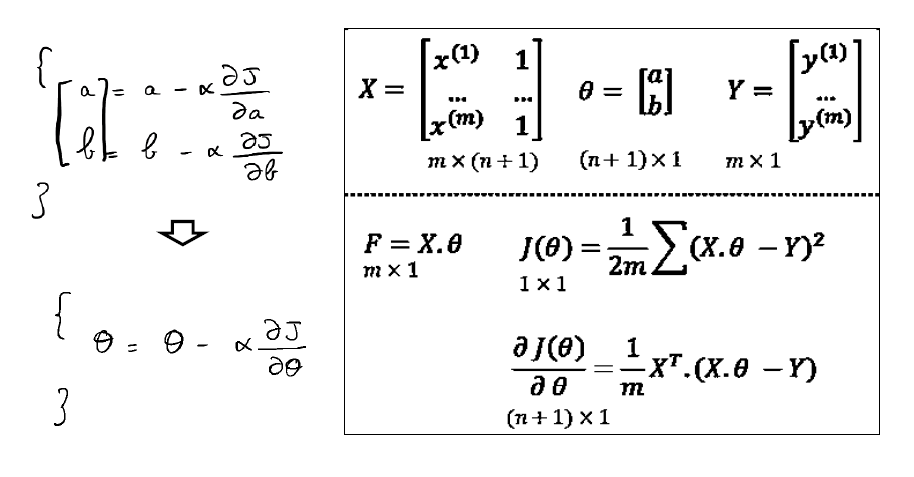
<center>Représentation d'une descente de gradient d'une régression linéaire simple</center>

_____

# Étude des données 

L'étude des données utilisées pour ce brief n'étant pas l'objectif de celui-ci et les jeux de données utilisés étant suffisamment documentés, nous allons mettre en évidence les modèles choisis et les caractéristiques retenues sans rentrer dans les détails.

Nous utilisons pour ce faire la bibliothèque ```seaborn``` afin de visualiser les données récupérées à l'aide de la bibliothèque ```pandas``` :

In [1]:
import seaborn as sns
import pandas as pd

## reg_simple.csv

On commence par s'assurer de la validité des données, notamment le formatage des caractéristiques et l'absence de valeurs avec la fonction ```pd.info()``` :

In [2]:
dataRegSimple = pd.read_csv("premierModeleIA_app/static/Data_Reg/reg_simple.csv")
dataRegSimple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   heure_rev  27 non-null     int64
 1   note       27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


Une fois les données validées, on peut afficher les valeurs de la cible ```note``` en fonction de celles de la caractéristique ```heure_rev``` avec la fonction ```sns.scatterplot()``` :

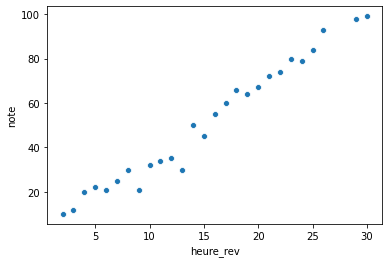

In [17]:
sns.scatterplot(x=dataRegSimple["heure_rev"], y=dataRegSimple["note"])
plt.show()

Le résultat obtenu ressemble à une **distribution linéaire simple**.

## boston_house_prices.csv

In [4]:
dataBoston = pd.read_csv("premierModeleIA_app/static/Data_Reg/boston_house_prices.csv")
dataBoston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Les données étant toutes valides, on commence par étudier la corrélation de la cible ```MEDV``` avec les caractéristiques, à l'aide de la fonction ```pd.corr()``` et en visualisant le résultat avec la fonction ```sns.heatmap()``` :

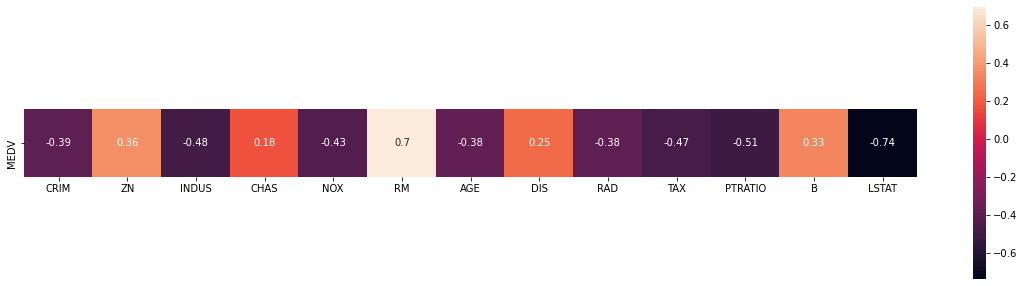

In [18]:
import numpy as np
import matplotlib.pyplot as plt


columns = dataBoston.columns
corrDataBostonMEDV = pd.DataFrame([dataBoston.corr().loc["MEDV"]], columns=columns[:-1])

f, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(corrDataBostonMEDV, square=True, annot=True)
plt.show()

Deux colonnes semblent être plus corrélées que les autres à la cible ```MEDV``` : ```RM``` et ```LSTAT```; la régression à appliquer sera la **linéaire multiple**.

## Position_Salaries.csv

In [11]:
dataPositionSalaries = pd.read_csv("premierModeleIA_app/static/Data_Reg/Position_Salaries.csv")
dataPositionSalaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


On peut remarquer que la caractéristique ```Position``` n'est pas une variable quantitative ; examinons plus attentivement les valeurs des caractéristiques avec la fonction ```pd.DataFrame.head()``` :

In [12]:
dataPositionSalaries.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Les colonnes ```Position``` et ```Level``` du dataset semblent représenter des caractéristiques catégorielles variant de la même façon, en prendre une seule devrait pouvoir nous suffire à établir notre modèle, autant prendre la colonne ```Level``` comme caractéristique.

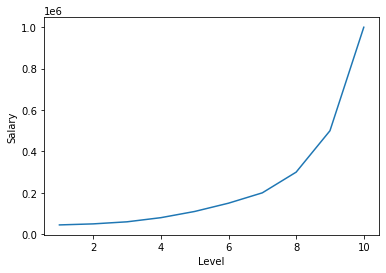

In [15]:
sns.lineplot(dataPositionSalaries["Level"], dataPositionSalaries["Salary"])
plt.show()

Le résultat obtenu ressemble à une **distribution polynomiale**.

___

# Présentation des résultats

L'application ```premierModeleIA``` a été pensée comme une bibliothèque afin de pouvoir facilement accéder aux fonctions détaillées dans le brief. 

Le choix du coefficient initial $\theta$ n'a pas été choisi au hasard mais par un premier calcul matriciel et permet donc d'avoir des modèles très performants ($\alpha=0.5$ et $n=100$). 

La bibliothéaque ```scikit-learn``` a été utilisée pour l'étape de prétraitement des données.

## reg_simple.csv

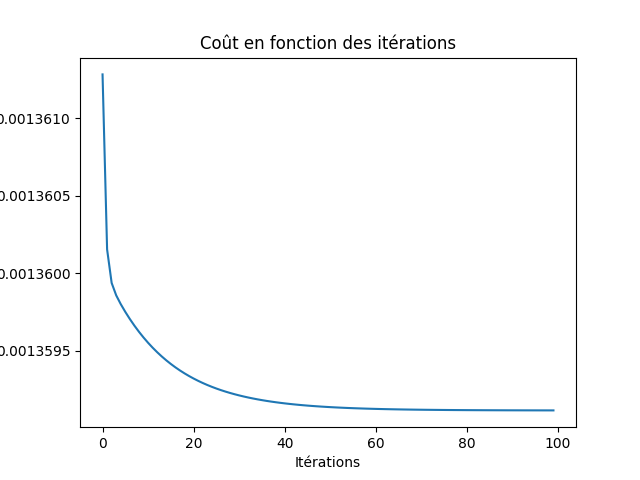

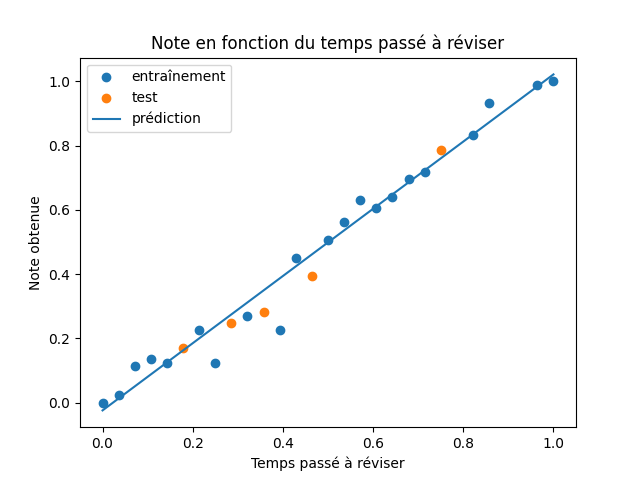

##  boston_house_prices.csv

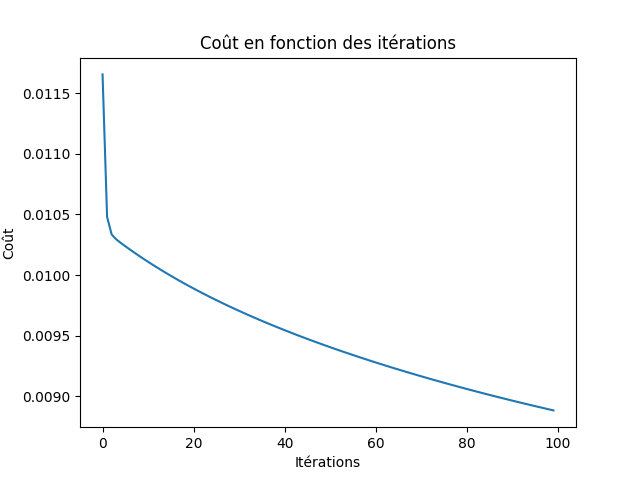

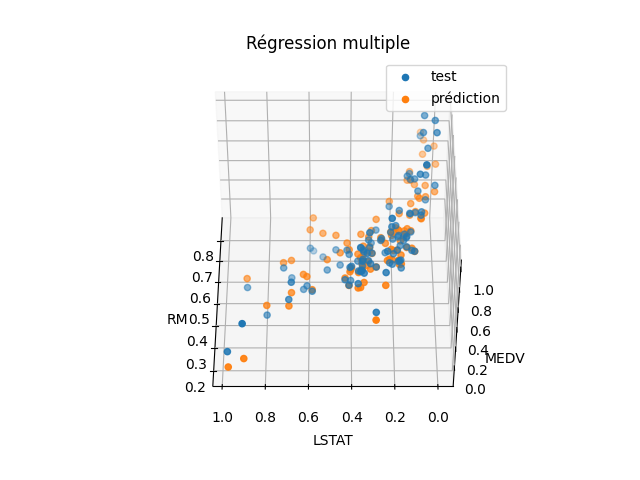

## Position_Salaries.csv

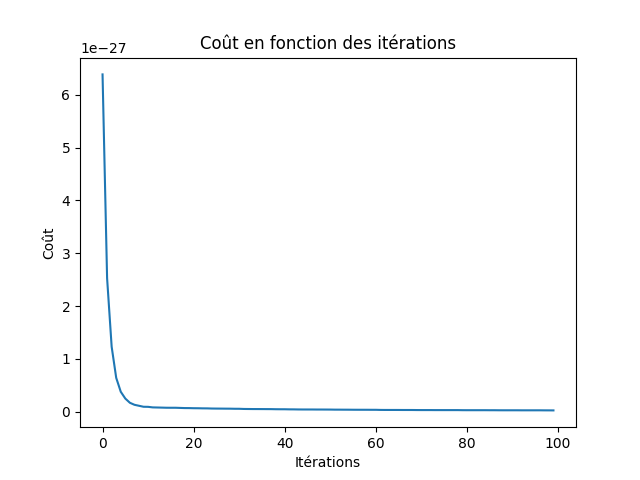

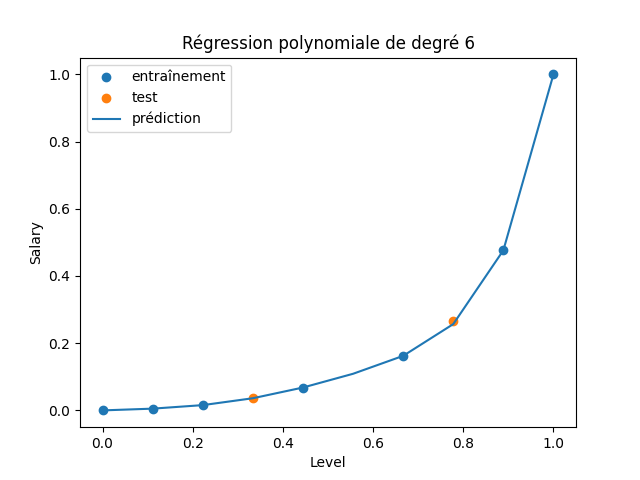

___

# Évaluation des résultats

## reg_simple.csv

```python
MSE=7.087527499257835e-05
R2=0.92817775
```

##  boston_house_prices.csv

```python
MSE=0.017556610965717992
R2=0.65928009
```

## Position_Salaries.csv

```python
MSE=0.00013111854453815667
R2=0.99876558
```

___

# Présentation des résultats avec Scikit-Learn

___

# Comparaison avec la méthode normale

___

# Conclusion

___

# Sources 

* [1] <a id="1" href="https://fr.wikipedia.org/wiki/R%C3%A9gression_(statistiques)">https://fr.wikipedia.org/wiki/Régression (statistiques)</a>
* [2] <a id="2" href="./Ressources/Presentation-ML_Matrices.pdf">Machine Learning, Youssef Mourchid</a>